In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rc("figure", figsize=(20, 10))


In [3]:
ddf = dd.read_parquet(
    "title",
    columns=["대장_종류_코드", "옥내_자주식_대수(대)", "옥외_자주식_대수(대)"],
)
ddf


,대장_종류_코드,옥내_자주식_대수(대),옥외_자주식_대수(대)
npartitions=46,,,
,object,Int64,Int64
,...,...,...
...,...,...,...
,...,...,...
,...,...,...


In [10]:
X = ddf[["옥내_자주식_대수(대)", "옥외_자주식_대수(대)"]]
X


,옥내_자주식_대수(대),옥외_자주식_대수(대)
npartitions=46,,
,Int64,Int64
,...,...
...,...,...
,...,...
,...,...


In [11]:
y = ddf["대장_종류_코드"]
y


Dask Series Structure:
npartitions=46
    object
       ...
     ...  
       ...
       ...
Name: 대장_종류_코드, dtype: object
Dask Name: getitem, 2 graph layers

In [12]:
clf = DecisionTreeClassifier(max_leaf_nodes=10).fit(X, y)


대장 종류 코드 의미:

    2   일반
    3   표제부(집합)

In [13]:
clf.classes_


array(['2', '3'], dtype=object)

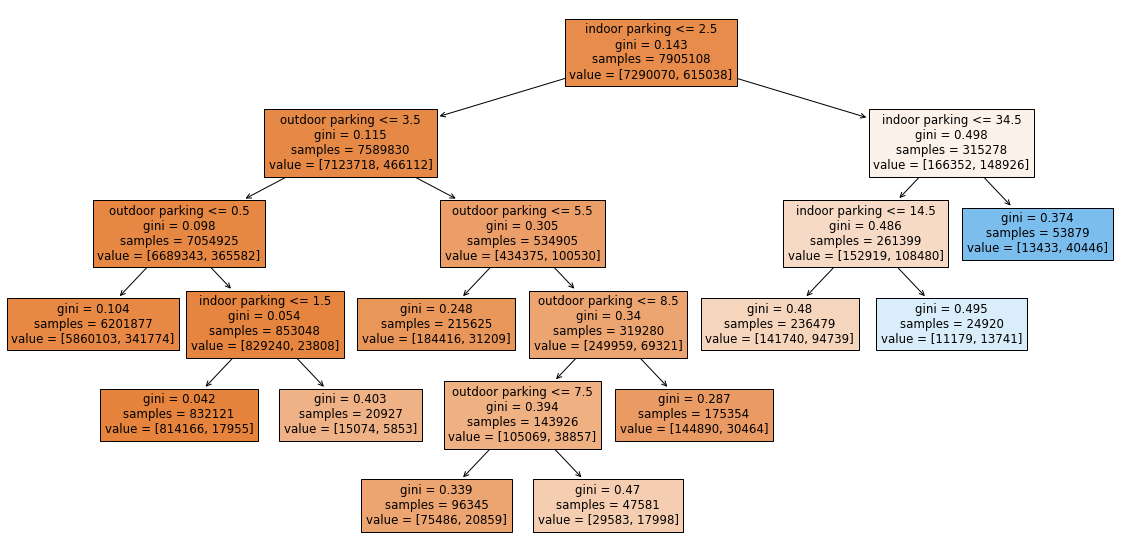

In [16]:
plt.figure()
plot_tree(clf, feature_names=["indoor parking", "outdoor parking"], filled=True)
plt.show()


In [ ]:
clf.score(X, y)
